<center>
  <h1> Analyse des Sentiments </h1>
</center>

# Importation des bibliothèques nécessaires

In [ ]:
# For TensorFlow
# For PyTorch
# For Flax

In [20]:
!pip install tensorflow  
!pip install torch  
!pip install flax  

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ----------------------------------- ---- 51.2

   -------------------------------------- - 291.5/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 291.6/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 291.7/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 291.8/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 291.9/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.0/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.0/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.2/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.2/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.3/300.9 MB 2.3 MB/s eta 0:00:04
   -------------------------------------- - 292.3/300.9 MB 2.3 MB/s eta 0:00:04
   -------------------------------------- - 292.4/300.9 MB 2.3 MB/s eta 0:00:04
   -------------------------------------

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB 393.8 kB/s eta 0:08:09
   ---------------------------------------- 0.1/192.3 MB 939.4 kB/s eta 0:03:25
   ---------------------------------------- 0.2/192.3 MB 919.0 kB/s eta 0:03:30
   ---------------------------------------- 0.2/192.3 MB 1.1 MB/s eta 0:02:54
   ---------------------------------------- 0.4/192.3 MB 1.5 MB/s eta 0:02:11
   ---------------------------------------- 0.5/192.3 MB 1.7 MB/s eta 0:01:54
   ---------------------------------------- 0.6/192.3 MB 1.8 MB/s eta 0:01:48
   ---------------------------------------- 0.7/192.3 MB 1.9 MB/s eta 0:01:41
   ---------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.3.2 which is incompatible.



  Obtaining dependency information for flax from https://files.pythonhosted.org/packages/95/a6/5017385e65dee7609250f1dc20c3874289afdf57212e65b7f26411c4313b/flax-0.7.5-py3-none-any.whl.metadata
  Obtaining dependency information for jax>=0.4.19 from https://files.pythonhosted.org/packages/28/d0/edf653ea02628f2130ea2557f96d02b264768a2f54d22a9c002c7119cb1d/jax-0.4.23-py3-none-any.whl.metadata
  Obtaining dependency information for optax from https://files.pythonhosted.org/packages/95/f6/36933cf75cb37e21d3de2dc6195306aa1cc30250e29e55c10cc5a84c1ce6/optax-0.1.8-py3-none-any.whl.metadata
  Obtaining dependency information for orbax-checkpoint from https://files.pythonhosted.org/packages/16/93/dd53bf35b6f736b65b64418b52649d1ae65e4ddb75d8db25eb1364a581a1/orbax_checkpoint-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorstore from https://files.pythonhosted.org/packages/95/92/2d76cd1533f8433db85d668c2f350933790703b2621bf6d1a7824e6f1b10/tensorstore-0.1.52-cp311-cp311-

In [1]:
!pip3 install torch torchvision torchaudio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#p2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

#nltk.download('stopwords')
#nltk.download('punkt')
"""
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
"""
"""
#!pip install PyTorch 
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
"""


In [ ]:
#conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

# 1- Exploration des données

## 1-1 Charger la dataset :
Démarrons notre exploration des délices culinaires sur Amazon en chargeant le jeu de données. Il regroupe près de 500 000 avis jusqu'à octobre 2012, offrant un aperçu détaillé des produits, des utilisateurs, des notations, et des textes authentiques des critiques. Cette plongée va au-delà des mets fins, incorporant des avis de différentes catégories sur Amazon.

In [ ]:
data = pd.read_csv('reviews.csv')

## 1-2 Aperçu des premières lignes

La commande `data.head()` permet d'afficher les cinq premières lignes de votre ensemble de données, offrant ainsi un aperçu rapide des informations contenues dans chaque colonne. Cela facilite la compréhension initiale de la structure des données que vous manipulez.

In [ ]:
data.head()

## 1-3 Informations générales sur la dataset

In [ ]:
print(data.info())

### Description des resultats :
La sortie de `data.info()` fournit des informations détaillées sur la structure de votre ensemble de données. Voici une description des résultats :

- **Type de l'objet :** `pandas.core.frame.DataFrame`
- **Index :** RangeIndex, allant de 0 à 568453, indiquant le nombre total d'entrées (lignes) dans l'ensemble de données.
- **Colonnes :** Il y a 10 colonnes au total.
- **Attributs et types de données :**
  - 'Id' est de type `int64` avec 568454 valeurs non nulles.
  - 'ProductId' est de type `object` (généralement une chaîne de caractères) avec 568454 valeurs non nulles.
  - 'UserId' est de type `object` avec 568454 valeurs non nulles.
  - 'ProfileName' est de type `object` avec 568428 valeurs non nulles (26 valeurs manquantes).
  - 'HelpfulnessNumerator' est de type `int64` avec 568454 valeurs non nulles.
  - 'HelpfulnessDenominator' est de type `int64` avec 568454 valeurs non nulles.
  - 'Score' est de type `int64` avec 568454 valeurs non nulles.
  - 'Time' est de type `int64` avec 568454 valeurs non nulles.
  - 'Summary' est de type `object` avec 568427 valeurs non nulles (27 valeurs manquantes).
  - 'Text' est de type `object` avec 568454 valeurs non nulles.

- **Mémoire utilisée :** Environ 43.4 MB.

- **Valeurs manquantes :** 'ProfileName' a 26 valeurs manquantes et 'Summary' a 27 valeurs manquantes.

Ces informations sont cruciales pour comprendre la composition de votre ensemble de données, y compris les types de données, la présence de valeurs manquantes, et la mémoire utilisée par l'ensemble de données.

## 1-4 Statistiques descriptives pour les attributs numériques

In [ ]:
data['Score'].describe()

### Description des resultats :
La sortie de la commande `data['Score'].describe()` fournit des statistiques descriptives spécifiques pour la colonne 'Score' de votre ensemble de données. Voici une description des résultats :

- **count :** Le nombre total d'observations dans la colonne 'Score' est de 568,454.

- **mean :** La moyenne (valeur moyenne) des scores dans la colonne 'Score' est d'environ 4.18.

- **std :** L'écart type, qui mesure la dispersion des scores autour de la moyenne, est d'environ 1.31.

- **min :** Le score minimum observé est 1.

- **25% :** Le premier quartile (Q1) est à 4, ce qui signifie que 25% des scores sont égaux ou inférieurs à 4.

- **50% :** La médiane (Q2) est à 5, ce qui indique que 50% des scores sont égaux ou inférieurs à 5.

- **75% :** Le troisième quartile (Q3) est à 5, ce qui signifie que 75% des scores sont égaux ou inférieurs à 5.

- **max :** Le score maximum observé est 5.

Ces statistiques fournissent un aperçu de la distribution des scores dans la colonne 'Score'. En l'occurrence, la plupart des scores semblent être concentrés autour des valeurs élevées, avec une moyenne de 4.18 et une médiane de 5. Cela suggère une tendance positive dans les évaluations.

# 2- Vérification des valeurs manquantes ou d'incohérences

## 2-1 Vérifier la présence de valeurs manquantes

In [ ]:
print(data.isnull().sum())

### Description des resultats :
La sortie que vous avez présentée est le résultat de la commande `data.isnull().sum()` et indique le nombre de valeurs manquantes pour chaque colonne de votre ensemble de données. Voici une description des résultats :

- **'Id':** Aucune valeur manquante dans la colonne 'Id'.
  
- **'ProductId':** Aucune valeur manquante dans la colonne 'ProductId'.
  
- **'UserId':** Aucune valeur manquante dans la colonne 'UserId'.
  
- **'ProfileName':** Il y a 26 valeurs manquantes dans la colonne 'ProfileName'.
  
- **'HelpfulnessNumerator':** Aucune valeur manquante dans la colonne 'HelpfulnessNumerator'.
  
- **'HelpfulnessDenominator':** Aucune valeur manquante dans la colonne 'HelpfulnessDenominator'.
  
- **'Score':** Aucune valeur manquante dans la colonne 'Score'.
  
- **'Time':** Aucune valeur manquante dans la colonne 'Time'.
  
- **'Summary':** Il y a 27 valeurs manquantes dans la colonne 'Summary'.
  
- **'Text':** Aucune valeur manquante dans la colonne 'Text'.

Ces résultats vous indiquent les colonnes spécifiques qui ont des valeurs manquantes et le nombre de ces valeurs manquantes. C'est important pour décider comment traiter ces valeurs manquantes, que ce soit en les supprimant, en les remplaçant par des valeurs par défaut ou en utilisant d'autres méthodes de gestion des données manquantes en fonction du contexte de votre analyse.

## Vérifier les valeurs uniques dans chaque colonne

In [ ]:
data.nunique()

### Description des resultats :
La sortie de `data.nunique()` donne le nombre de valeurs uniques dans chaque colonne de votre ensemble de données. Voici une description des résultats pour chaque colonne :

- **'Id':** 568454 valeurs uniques.
  
- **'ProductId':** 74258 valeurs uniques.
  
- **'UserId':** 256059 valeurs uniques.
  
- **'ProfileName':** 218415 valeurs uniques.
  
- **'HelpfulnessNumerator':** 231 valeurs uniques.
  
- **'HelpfulnessDenominator':** 234 valeurs uniques.
  
- **'Score':** 5 valeurs uniques (ce qui est cohérent avec le fait que les scores sont souvent évalués sur une échelle discrète).
  
- **'Time':** 3168 valeurs uniques.
  
- **'Summary':** 295742 valeurs uniques.
  
- **'Text':** 393579 valeurs uniques.

Ces informations peuvent être utiles pour comprendre la diversité des données dans chaque colonne. Par exemple, dans la colonne 'Score', il y a seulement 5 valeurs uniques, indiquant probablement une échelle de notation restreinte. D'un autre côté, dans la colonne 'Text', il y a 393579 valeurs uniques, soulignant la variété des textes présents dans cet ensemble de données.

## Vérifier la distribution des scores 

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=data)
plt.title('Distribution des Scores')
plt.show()

### Expliquons les résultats :

- **Score 5 :** Il y a 363,122 occurrences où le score est égal à 5.
  
- **Score 4 :** Il y a 80,655 occurrences où le score est égal à 4.

- **Score 1 :** Il y a 52,268 occurrences où le score est égal à 1.

- **Score 3 :** Il y a 42,640 occurrences où le score est égal à 3.

- **Score 2 :** Il y a 29,769 occurrences où le score est égal à 2.

Ces résultats donnent une vue détaillée de la distribution des scores dans votre ensemble de données. Par exemple, le score 5 est largement plus fréquent que les autres scores, suggérant que la majorité des évaluations sont positives. À l'inverse, les scores 1, 2 et 3 sont moins fréquents, indiquant une proportion plus faible d'évaluations négatives ou neutres. Cette information peut être utile pour comprendre la tendance générale des évaluations dans votre ensemble de données.

# Prétraitement des données :
## Supprimer les colonnes non pertinentes

In [11]:
#colonnes_non_pertinentes = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']
#data = data.drop(colonnes_non_pertinentes, axis=1)
#data

## Gérer les valeurs manquantes

### Gérer les valeurs manquantes

In [12]:
data['Summary'] = data['Summary'].fillna('')

### Traitement du texte

le code suivant réalise les actions suivantes :

1. Supprime les colonnes non pertinentes.
2. Gère les valeurs manquantes en remplaçant par des chaînes vides.
3. Applique un processus de prétraitement au texte dans les colonnes 'Summary' et 'Text', supprimant la ponctuation, mettant en minuscules et supprimant les stopwords.

In [13]:
#Travailler sur les 5000 lignes
data = data.head(10000)

In [14]:
def preprocess_text(text):
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Appliquer le prétraitement aux colonnes 'Summary' et 'Text' en utilisant .loc[]
data.loc[:, 'Summary'] = data['Summary'].apply(preprocess_text)
data.loc[:, 'Text'] = data['Text'].apply(preprocess_text)

# Afficher les premières lignes après le prétraitement
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertised,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight says,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy great price wide assortment yummy ...


## Analyse Exploratoire des Données (EDA)

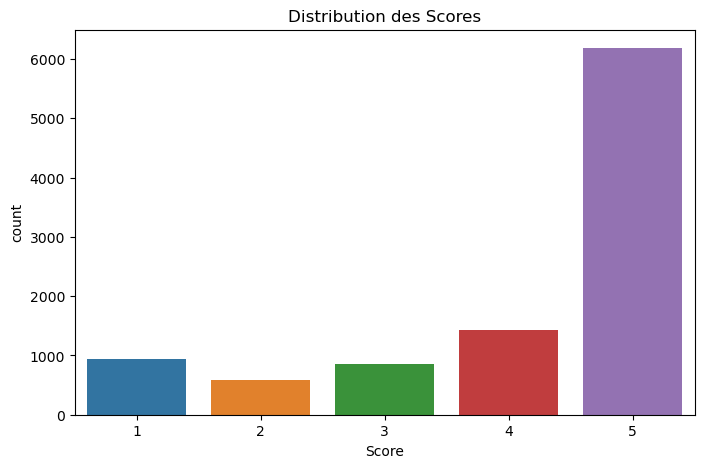

'\n# Explorer d\'autres statistiques descriptives\ndescriptive_stats = data.describe(include=\'all\')\nprint("Statistiques descriptives pour chaque attribut pertinent :\n")\ndescriptive_stats\n\n# Vous pouvez également explorer la corrélation entre les attributs numériques\ncorrelation_matrix = data.corr()\nplt.figure(figsize=(10, 8))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Matrice de corrélation\')\nplt.show()'

In [15]:
# Visualiser la distribution des scores
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=data)
plt.title('Distribution des Scores')
plt.show()
"""
# Explorer d'autres statistiques descriptives
descriptive_stats = data.describe(include='all')
print("Statistiques descriptives pour chaque attribut pertinent :\n")
descriptive_stats

# Vous pouvez également explorer la corrélation entre les attributs numériques
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()"""

# Use Roberta Pretrained Model

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [18]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\BYDEVMAR\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\BYDEVMAR\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [26]:
def roberta_scores(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'rta_neg' : scores[0],
        'rta_neu' : scores[1],
        'rta_pos' : scores[2]
    }
    return scores_dict

In [28]:
data = data.head(500)
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['Id']

        # Perform sentiment analysis with Roberta
        roberta_result = roberta_scores(text)

        # Keep only Roberta results
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

In [29]:
res

{1: {'rta_neg': 0.007874446, 'rta_neu': 0.08880092, 'rta_pos': 0.90332466},
 2: {'rta_neg': 0.08493852, 'rta_neu': 0.8423908, 'rta_pos': 0.07267068},
 3: {'rta_neg': 0.0046725716, 'rta_neu': 0.13230933, 'rta_pos': 0.86301816},
 4: {'rta_neg': 0.0055126064, 'rta_neu': 0.34244046, 'rta_pos': 0.65204686},
 5: {'rta_neg': 0.001966447, 'rta_neu': 0.012693261, 'rta_pos': 0.9853403},
 6: {'rta_neg': 0.0023043938, 'rta_neu': 0.048075844, 'rta_pos': 0.9496198},
 7: {'rta_neg': 0.0020632278, 'rta_neu': 0.012395268, 'rta_pos': 0.9855415},
 8: {'rta_neg': 0.0017318623, 'rta_neu': 0.014302323, 'rta_pos': 0.9839659},
 9: {'rta_neg': 0.0155409295, 'rta_neu': 0.67226887, 'rta_pos': 0.31219015},
 10: {'rta_neg': 0.008339728, 'rta_neu': 0.20592855, 'rta_pos': 0.7857317},
 11: {'rta_neg': 0.054626763, 'rta_neu': 0.17712384, 'rta_pos': 0.7682494},
 12: {'rta_neg': 0.27985084, 'rta_neu': 0.65204746, 'rta_pos': 0.06810173},
 13: {'rta_neg': 0.12532794, 'rta_neu': 0.570371, 'rta_pos': 0.30430102},
 14: {'rta